In [261]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [262]:
data = pd.read_csv("epa-sea-level.csv")
del data['NOAA Adjusted Sea Level']
data.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound
0,1880,0.000000,-0.952756,0.952756
1,1881,0.220472,-0.732283,1.173228
2,1882,-0.440945,-1.346457,0.464567
3,1883,-0.232283,-1.129921,0.665354
4,1884,0.590551,-0.283465,1.464567


In [263]:
data.columns

Index(['Year', 'CSIRO Adjusted Sea Level', 'Lower Error Bound',
       'Upper Error Bound'],
      dtype='object')

In [264]:
data.dtypes

Year                          int64
CSIRO Adjusted Sea Level    float64
Lower Error Bound           float64
Upper Error Bound           float64
dtype: object

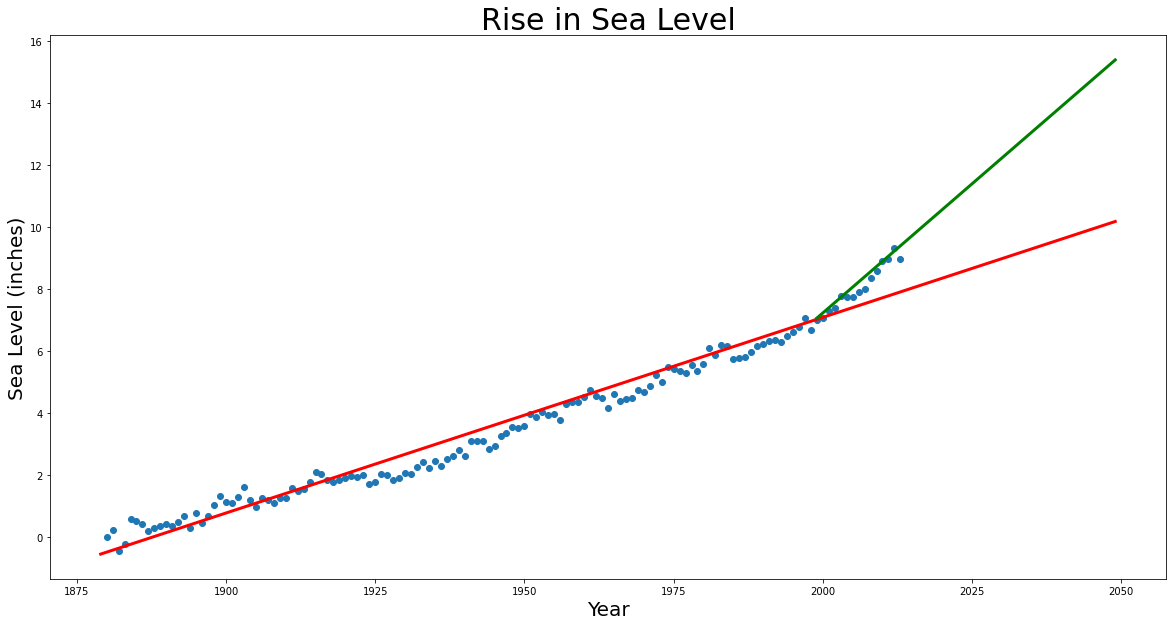

In [265]:

def draw_plot():
    # Read data from file
    data = pd.read_csv("epa-sea-level.csv")
    del data['NOAA Adjusted Sea Level']
    data.head()

    # Create scatter plot
    plt.figure(figsize=(20,10))
    scat = plt.scatter(data['Year'], data['CSIRO Adjusted Sea Level'])

    # Create first line of best fit
    result = linregress(data['Year'], data['CSIRO Adjusted Sea Level'])
    slope = result.slope
    intercept = result.intercept
    
    data2 = data
    for x in range(37):
      data2 = data2.append({'Year':(2014+x), 'CSIRO Adjusted Sea Level':0, 'Lower Error Bound':0, 'Upper Error Bound':0}, ignore_index=True)
    #data2['Year'] = data2['Year'].apply(int)
    
    y_hat = slope*data2['Year'] + intercept
    
    plt.plot(range(1879,2050), y_hat, color='red', lw=3)
    plt.xticks([1850.0, 1875.0, 1900.0, 1925.0, 1950.0, 1975.0, 2000.0, 2025.0, 2050.0, 2075.0])
  
    # Create second line of best fit
    result = linregress(data[data['Year']>=2000].Year, data['CSIRO Adjusted Sea Level'].iloc[120:] )
    slope = result.slope
    intercept = result.intercept
    
    data3 = data
    for x in range(37):
      data3 = data3.append({'Year':(2014+x), 'CSIRO Adjusted Sea Level':0, 'Lower Error Bound':0, 'Upper Error Bound':0}, ignore_index=True)
    #data3['Year'] = data3['Year'].apply(int)
    
    y_hat = slope*data3['Year'] + intercept
    plt.plot(range(1999,2050), y_hat[120:], color='green', lw=3)


    # Add labels and title
    plt.title("Rise in Sea Level", size=30)
    plt.xlabel("Year", size='20')
    plt.ylabel("Sea Level (inches)", size='20')
    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()
draw_plot()